# Lab4 - Training Deep Neural Network
- Name1, Student's ID1
- Name2, Student's ID2

Name your file to 59_34xx_34xx.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
- What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
- What do you mean by good model performance? How do you know that your model is ready to be deploy?
- Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
- Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by
6.1 Add more layer
6.2 Make layer bigger
6.3 Train more epochs

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)



**Exploding Gradients :**

exploding gradients can result in an unstable network that at best cannot learn from the training data and at worst results in NaN weight values that can no longer be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all important library to this project.

In [1]:
import keras
import numpy

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Future

### 1. Load MNIST data

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

In [3]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


In [4]:
train_labels[8]

1

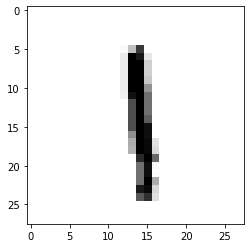

In [5]:
digit = train_images[8]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [6]:
train_images[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### 2. Preprocess a data

In [7]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [8]:
from keras.utils import to_categorical

In [9]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
test_labels.shape

(10000, 10)

In [11]:
train_images[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
train_labels[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 3. Build a model 
Using `Sequential()`, build a five-fully connect layer with 128 neuron each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class *softmax* as an activation function. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [13]:
from keras import models
from keras import layers

In [14]:
nn = models.Sequential()
nn.add(layers.Dense(128, activation='elu',input_shape=(28*28,),kernel_initializer='he_normal'))
nn.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
nn.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
nn.add(layers.Dense(128, activation='elu',kernel_initializer='he_normal'))
nn.add(layers.Dense(10,activation='softmax'))

W0922 23:09:19.631360 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 23:09:19.656991 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 23:09:19.658970 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0922 23:09:19.695951 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
nn.compile(optimizer='Adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

W0922 23:09:19.711018 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0922 23:09:19.731103 4485277120 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

Hint: Use parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
from sklearn.model_selection import train_test_split

### Split data ###
train_images_tr, train_images_val, train_labels_tr, train_labels_val = \
train_test_split(train_images,train_labels, test_size = 0.1, random_state = 42,stratify=train_labels)
##################

In [17]:
### Fit the model ###
history = nn.fit(train_images_tr,train_labels_tr,epochs=10,batch_size=128)
#####################

W0922 23:09:21.720655 4485277120 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
54000/54000 [==============================] - 4s 79us/step - loss: 0.2724 - acc: 0.9180
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.1197 - acc: 0.9633
Epoch 3/10
54000/54000 [==============================] - 3s 55us/step - loss: 0.0822 - acc: 0.9738
Epoch 4/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.0651 - acc: 0.9790
Epoch 5/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.0510 - acc: 0.9836
Epoch 6/10
54000/54000 [==============================] - 3s 58us/step - loss: 0.0435 - acc: 0.9854
Epoch 7/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.0366 - acc: 0.9875
Epoch 8/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0346 - acc: 0.9883
Epoch 9/10
54000/54000 [==============================] - 4s 71us/step - loss: 0.0287 - acc: 0.9903
Epoch 10/10
54000/54000 [==============================] - 3s 62us/step - loss: 0.0247 - acc: 0.9916

In [18]:
history_val = nn.fit(train_images_val,train_labels_val,epochs=10,batch_size=128)

Epoch 1/10
6000/6000 [==============================] - 0s 69us/step - loss: 0.1297 - acc: 0.9702
Epoch 2/10
6000/6000 [==============================] - 0s 59us/step - loss: 0.0587 - acc: 0.9820
Epoch 3/10
6000/6000 [==============================] - 0s 56us/step - loss: 0.0315 - acc: 0.9902
Epoch 4/10
6000/6000 [==============================] - 0s 55us/step - loss: 0.0113 - acc: 0.9978
Epoch 5/10
6000/6000 [==============================] - 0s 61us/step - loss: 0.0081 - acc: 0.9992
Epoch 6/10
6000/6000 [==============================] - 0s 55us/step - loss: 0.0043 - acc: 0.9998
Epoch 7/10
6000/6000 [==============================] - 0s 56us/step - loss: 0.0036 - acc: 0.9998
Epoch 8/10
6000/6000 [==============================] - 0s 55us/step - loss: 0.0034 - acc: 0.9998
Epoch 9/10
6000/6000 [==============================] - 0s 55us/step - loss: 0.0033 - acc: 0.9998
Epoch 10/10
6000/6000 [==============================] - 0s 60us/step - loss: 0.0032 - acc: 0.9998


### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

#### Answer

- จากการ Train 10 epochs และกราฟที่ออกมา พบว่า Model เป็นแบบ Good Fit
- และเมื่อนำ Test set ไปทำการ Evalute model พบว่ามีค่า acc=0.97 ในขณะที่ model มีค่า acc=0.99
- มีค่าความถูกต้องและแม่นยำของ Model อยู่ที่ 98%
- จึงถือว่า Performace ของ model ดีมาก

In [19]:
import  matplotlib.pyplot  as plt20
%matplotlib inline

In [22]:
def plot_loss_fn(history,history_val):
    loss = history.history['loss']
    val_loss = history_val.history['loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history,history_val):

    acc = history.history['acc']
    val_acc = history_val.history['acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

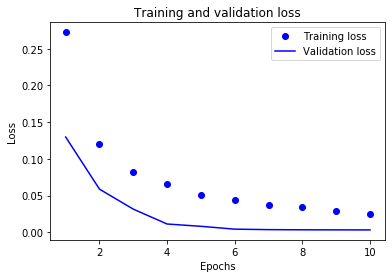

In [23]:
plot_loss_fn(history,history_val)

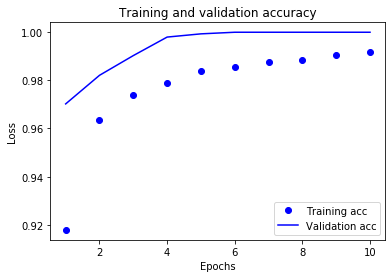

In [24]:
plot_acc_fn(history,history_val)

In [27]:
test_loss, test_acc = nn.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 1s 66us/step
Test Loss: 0.08031111495804762
Test Accuracy: 0.9796


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
prediction = nn.predict_classes([test_images])
print(confusion_matrix(test_labels.argmax(axis=1),prediction))
print(classification_report(test_labels.argmax(axis=1),prediction))
###########################

[[ 969    0    3    1    0    1    3    2    1    0]
 [   0 1126    3    0    0    0    3    0    3    0]
 [   1    2 1014    2    1    2    1    6    3    0]
 [   0    0    4  986    0    4    0    6    5    5]
 [   0    0    4    1  954    1    5    3    3   11]
 [   3    0    0   10    1  866    4    2    3    3]
 [   2    2    2    1    4    4  942    0    1    0]
 [   2    1   10    0    0    0    0 1009    2    4]
 [   0    0    3    5    3    6    2    4  947    4]
 [   4    1    1    5    8    3    0    1    3  983]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98   

### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get? (See https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

You can also try to do a data augmentation.

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

### Result & Discussion 

- Write down the key finding from this lab. Discuss what you had done, what do you get from the output or a result, and why (support your reason)

### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with black (#000000) background and white (#FFFFFF) paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)

for local pc :
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

for colab use:
3. ```import cv2 as cv```
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?